In [10]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the pneumothorax dataset in the Downloads directory
dataset_path = Path.home() / "Downloads" / "pneumothorax"

# List the contents of the dataset directory
dataset_contents = os.listdir(dataset_path)
print(dataset_contents)

# Gather all DICOM file paths from the train and test subdirectories
train_files = list(dataset_path.glob("dicom-images-train/*/*/*.dcm"))
test_files = list(dataset_path.glob("dicom-images-test/*/*/*.dcm"))
print(f"Number of training files: {len(train_files)}")
print(f"Number of test files: {len(test_files)}")

# Load the CSV file containing the pneumothorax annotations
annotations_csv_path = dataset_path / "train-rle.csv"
annotations = pd.read_csv(annotations_csv_path)
print(annotations.head())


['dicom-images-test', 'dicom-images-train', 'train-rle.csv']
Number of training files: 10712
Number of test files: 1377
                                             ImageId  \
0  1.2.276.0.7230010.3.1.4.8323329.5597.151787518...   
1  1.2.276.0.7230010.3.1.4.8323329.12515.15178752...   
2  1.2.276.0.7230010.3.1.4.8323329.4904.151787518...   
3  1.2.276.0.7230010.3.1.4.8323329.32579.15178751...   
4  1.2.276.0.7230010.3.1.4.8323329.32579.15178751...   

                                       EncodedPixels  
0                                                 -1  
1                                                 -1  
2   175349 7 1013 12 1009 17 1005 19 1003 20 1002...  
3   407576 2 1021 7 1015 10 1013 12 1011 14 1008 ...  
4   252069 1 1021 3 1020 4 1018 5 1018 6 1016 7 1...  


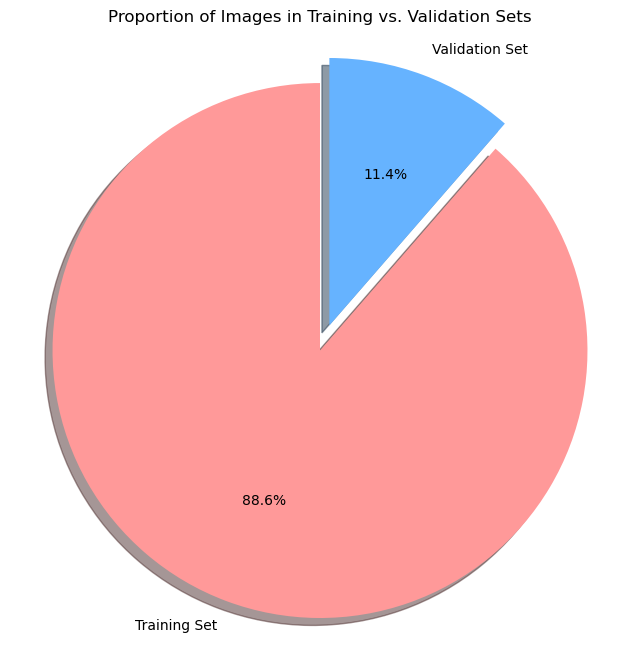

In [11]:


# Define the categories, sizes, and colors for the pie chart
categories = ['Training Set', 'Validation Set']
sizes = [len(train_files), len(test_files)]  # Utilizing variables from the previous code snippet
colors = ['#ff9999', '#66b3ff']  # Pink for training, blue for validation

# Determine the section of the pie chart to "explode" for emphasis
explode_section = (0, 0.1)  # Only the validation set will stand out

# Initialize a subplot for the pie chart with specified figure size
fig, ax = plt.subplots(figsize=(8, 8))
# Create the pie chart with specified data and visual properties
ax.pie(sizes, explode=explode_section, labels=categories, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Ensure the pie chart is a perfect circle
ax.axis('equal')

# Set the title for the pie chart
plt.title("Proportion of Images in Training vs. Validation Sets")
# Display the pie chart
plt.show()


In [12]:
# Count the number of samples with and without pneumothorax
num_samples_with_pneumothorax = annotations[annotations[' EncodedPixels'] != ' -1'].shape[0]
num_samples_without_pneumothorax = annotations[annotations[' EncodedPixels'] == ' -1'].shape[0]

# Print the counts
print(f'There are {num_samples_with_pneumothorax} samples with pneumothorax in the training set.')
print(f'There are {num_samples_without_pneumothorax} samples without pneumothorax in the training set.')


There are 3286 samples with pneumothorax in the training set.
There are 8296 samples without pneumothorax in the training set.


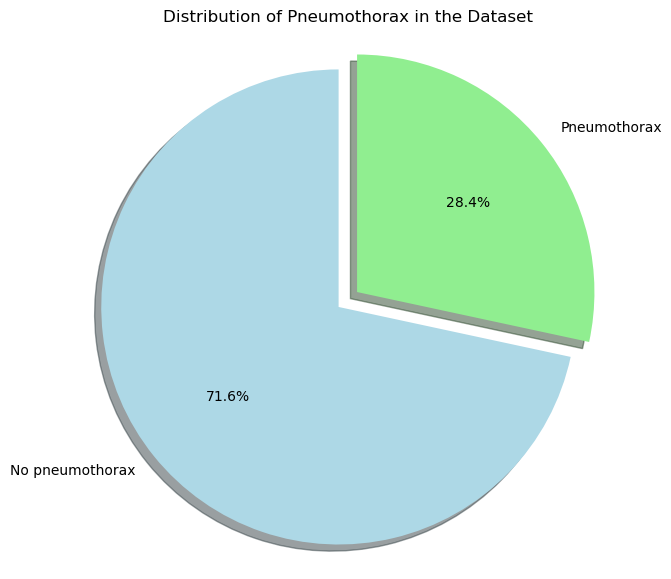

In [13]:
# Define labels, sizes, and colors for the pie chart
labels = ['No pneumothorax', 'Pneumothorax']
sizes = [num_samples_without_pneumothorax, num_samples_with_pneumothorax]
colors = ['lightblue', 'lightgreen']  # Specifying colors for each slice
explode = (0, 0.1)  # Emphasize the pneumothorax slice

# Create a pie chart with custom colors and an equal aspect ratio
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax.axis('equal')  # Ensure the pie chart is a circle

# Add a title and show the plot
plt.title("Distribution of Pneumothorax in the Dataset")
plt.show()


In [14]:
missing_data = len(annotations) - len(train_files)
print('There are {} missing samples.'.format(missing_data))

There are 870 missing samples.


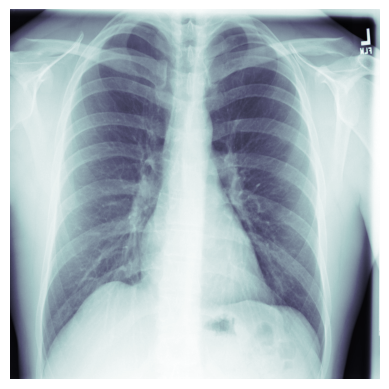

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.1000.1517875165.878027
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.1000.1517875165.878027
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

In [15]:
import pydicom
# Read the DICOM file and extract pixel data for the image
dicom_file_path = train_files[0]  # Assuming train[0] is a file path
dicom_data = pydicom.read_file(dicom_file_path)
image_data = dicom_data.pixel_array

# Display the image with 'bone' colormap and no grid
plt.imshow(image_data, cmap='bone')
plt.axis('off')  # Hides the grid by turning off the axis
plt.show()

# Display the metadata from the DICOM file
print(dicom_data)


In [16]:

#dataframe to ease the access
patients = []
missing = 0

pd.reset_option('max_colwidth')

for t in train_files:
    data = pydicom.dcmread(t)
    patient = {}
    patient["UID"] = data.SOPInstanceUID
    try:
        encoded_pixels = annotations[annotations["ImageId"] == patient["UID"]].values[0][1]
        patient["EncodedPixels"] = encoded_pixels
    except:
        missing = missing + 1
    patient["Age"] = data.PatientAge
    patient["Sex"] = data.PatientSex
    patient["Modality"] = data.Modality
    patient["BodyPart"] = data.BodyPartExamined
    patient["ViewPosition"] = data.ViewPosition
    patient["path"] = "../input/siim-acr-pneumothorax-segmentation-data/pneumothorax/dicom-images-train/" + data.StudyInstanceUID + "/" + data.SeriesInstanceUID + "/" + data.SOPInstanceUID + ".dcm"
    patients.append(patient)

print("missing labels: ", missing)
#pd.set_option('display.max_colwidth', -1)
df_patients = pd.DataFrame(patients, columns=["UID", "EncodedPixels", "Age", "Sex", "Modality", "BodyPart", "ViewPosition", "path"])
print("images with labels: ", df_patients.shape[0])
df_patients.head


missing labels:  37
images with labels:  10712


<bound method NDFrame.head of                                                      UID  \
0      1.2.276.0.7230010.3.1.4.8323329.1000.151787516...   
1      1.2.276.0.7230010.3.1.4.8323329.10000.15178752...   
2      1.2.276.0.7230010.3.1.4.8323329.10001.15178752...   
3      1.2.276.0.7230010.3.1.4.8323329.10002.15178752...   
4      1.2.276.0.7230010.3.1.4.8323329.10003.15178752...   
...                                                  ...   
10707  1.2.276.0.7230010.3.1.4.8323329.5792.151787519...   
10708  1.2.276.0.7230010.3.1.4.8323329.5793.151787519...   
10709  1.2.276.0.7230010.3.1.4.8323329.5794.151787519...   
10710  1.2.276.0.7230010.3.1.4.8323329.5795.151787519...   
10711  1.2.276.0.7230010.3.1.4.8323329.5796.151787519...   

                                           EncodedPixels Age Sex Modality  \
0                                                     -1  38   M       CR   
1                                                     -1  10   F       CR   
2                 

In [17]:
bodypart = df_patients["BodyPart"].values
print("Body parts:", list(set(bodypart)))

modality = df_patients["Modality"].values
print("Modality:", list(set(modality)))

view = list(df_patients["ViewPosition"].values)
print("View Positions: ", list(set(view)))

pa = view.count("PA")
ap = view.count("AP")
print(pa, ap)

Body parts: ['CHEST']
Modality: ['CR']
View Positions:  ['AP', 'PA']
6507 4205


Text(0.5, 1.0, 'View positions')

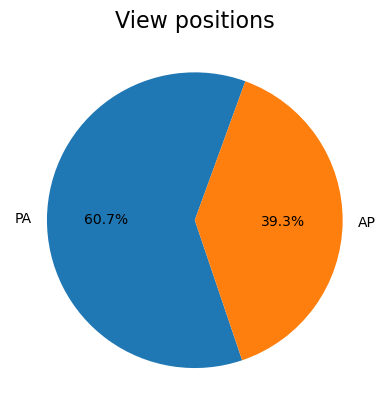

In [18]:
import seaborn as sns
basic_palette = sns.color_palette()
plt.pie([pa, ap], labels = ["PA", "AP"], colors=["#1f77b4", "#ff7f0e"], autopct='%1.1f%%', startangle=70)
plt.title("View positions", fontsize=16)

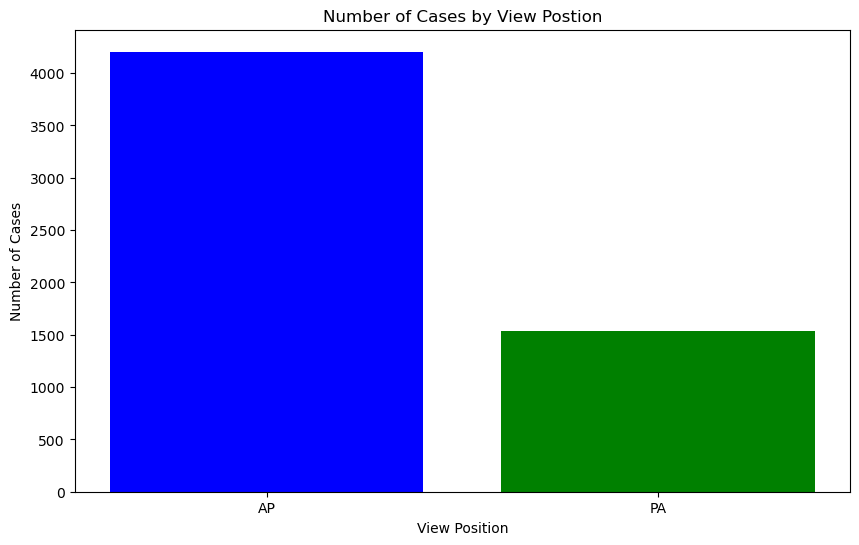

In [19]:
AP_angle = df_patients[(df_patients["ViewPosition"] == "AP") & (df_patients["EncodedPixels"] != "-1")]
PA_angle = df_patients[(df_patients["ViewPosition"] == "PA") & (df_patients["EncodedPixels"] != " -1")]
# Counting the number of cases for AP and PA angles
AP_count = len(AP_angle)
PA_count = len(PA_angle)
# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(['AP', 'PA'], [AP_count, PA_count], color=['blue', 'green'])
plt.title('Number of Cases by View Postion')
plt.xlabel('View Position')
plt.ylabel('Number of Cases')
plt.xticks(['AP', 'PA'])
plt.show()

[  1   2   2 ...  94 148 413]


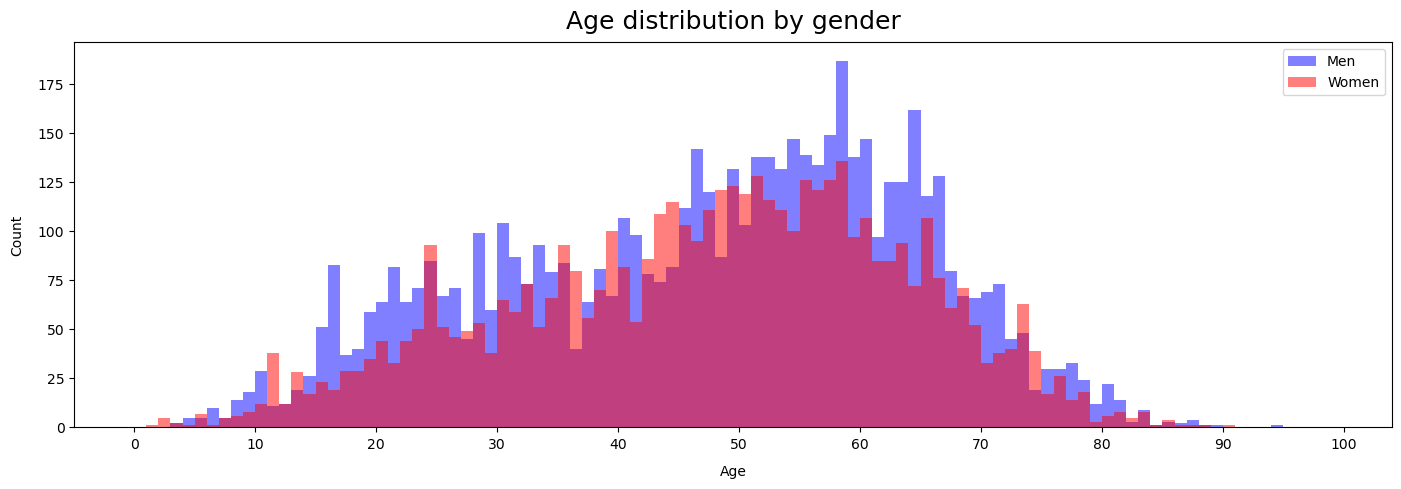

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Age' column to int
df_patients["Age"] = pd.to_numeric(df_patients["Age"])

# Sort the ages
sorted_ages = np.sort(df_patients["Age"].values)
print(sorted_ages)

# Create a figure with a specified size
plt.figure(figsize=(17, 5))

# Assuming 'Sex' column exists and has entries like 'Male' and 'Female'
# We will use different colors for men and women
men_ages = df_patients[(df_patients["Sex"] == "M") & (df_patients["EncodedPixels"] != "-1")]["Age"]
women_ages = df_patients[(df_patients["Sex"] == "F") & (df_patients["EncodedPixels"] != "-1")]["Age"]


# Histogram for men, color set to blue
plt.hist(men_ages, bins=[i for i in range(100)], color='blue', alpha=0.5, label='Men')

# Histogram for women, color set to red
plt.hist(women_ages, bins=[i for i in range(100)], color='red', alpha=0.5, label='Women')

# Add a title and labels to the histogram
plt.title("Age distribution by gender", fontsize=18, pad=10)
plt.xlabel("Age", labelpad=10)
plt.xticks([i*10 for i in range(11)])
plt.ylabel("Count", labelpad=10)

# Add a legend to differentiate the histograms
plt.legend()

# Show the plot
plt.show()

5903 4809
8296 2416
4554 1349 3742 1067


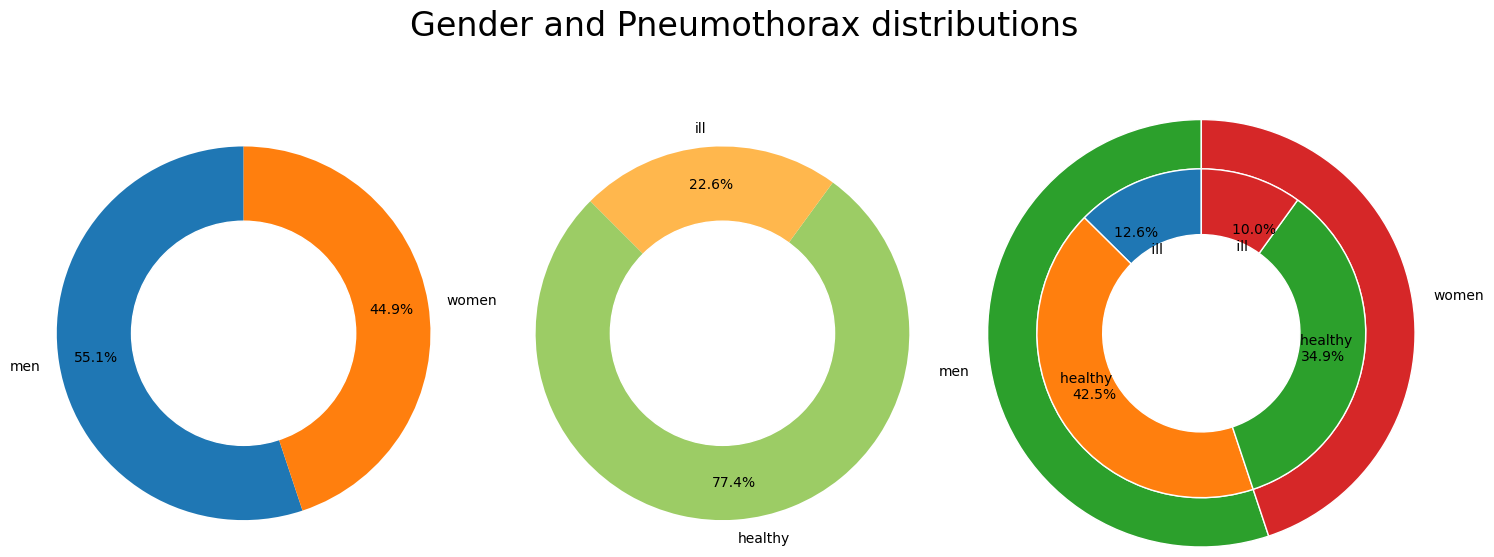

In [21]:
import matplotlib.pyplot as plt
#gender
men = df_patients[df_patients["Sex"] == "M"].shape[0]
women = df_patients.shape[0] - men
print(men, women)


#illness
healthy = df_patients[df_patients["EncodedPixels"] == " -1"].shape[0]
ill = df_patients.shape[0] - healthy
print(healthy, ill)

#gender + illness
men_h = df_patients[(df_patients["Sex"] == "M") & (df_patients["EncodedPixels"] == " -1")].shape[0]
men_ill = men - men_h
women_h = df_patients[(df_patients["Sex"] == "F") & (df_patients["EncodedPixels"] == " -1")].shape[0]
women_ill = women - women_h
print(men_h, men_ill, women_h, women_ill)

perc = [str(round(men_ill/107.12, 1)) + "% \n ill", "healthy \n" + str(round(men_h/107.12, 1)) + "%", "healthy \n" + str(round(women_h/107.12, 1)) + "%",str(round(women_ill/107.12, 1)) + "% \n ill"]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle("Gender and Pneumothorax distributions", fontsize=24, y=1.1)



#circle for donut chart
circle0 = plt.Circle( (0,0), 0.6, color = 'white')
circle1 = plt.Circle( (0,0), 0.4, color = 'white')
circle2 = plt.Circle( (0,0), 0.6, color = 'white')

#men women
ax[0].pie([men, women], labels=["men", "women"], colors=["#1f77b4", "#ff7f0e"], autopct='%1.1f%%', pctdistance=0.8, startangle=90)
ax[0].add_patch(circle0)
ax[0].axis('equal')

#gender healthy
mypie, _ = ax[2].pie([men, women], radius=1.3, labels=["men", "women"], colors=["#2ca02c", "#d62728"], startangle=90)
plt.setp( mypie, width=0.3, edgecolor='white')

mypie2, _ = ax[2].pie([ men_ill, men_h, women_h, women_ill], radius = 1.3 - 0.3, labels=perc, labeldistance=0.61,
                      colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"], startangle=90)
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

#healthy ill
ax[1].pie([healthy, ill], labels=["healthy", "ill"], colors=["#9CCC65", "#FFB74D"], autopct='%1.1f%%', pctdistance=0.8, startangle=135)
ax[1].add_patch(circle2)
ax[1].axis('equal')  

plt.tight_layout()
plt.show()

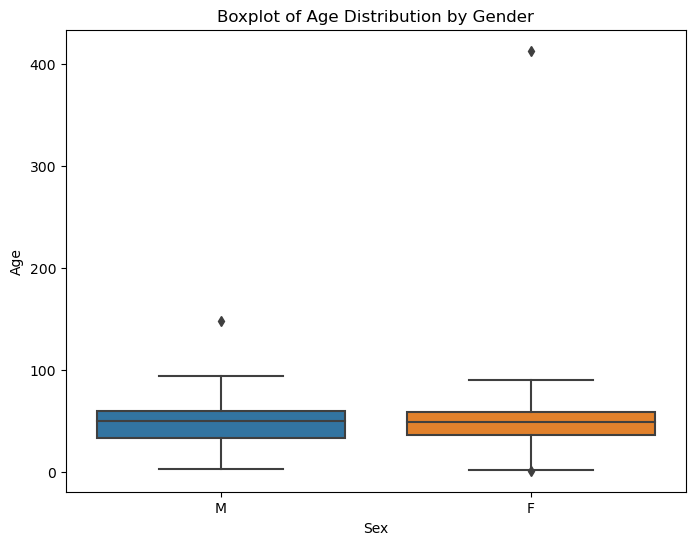

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Age', data=df_patients)
plt.title("Boxplot of Age Distribution by Gender")
plt.show()


In [35]:
import pandas as pd

# Assuming df_patients is already defined

# Convert Age to a numeric type, coercing errors to NaN
df_patients['Age'] = pd.to_numeric(df_patients['Age'], errors='coerce')

# Optionally handle NaN values in Age
# For example, you can drop them
df_patients = df_patients.dropna(subset=['Age'])

# Categorizing age into groups
age_bins = [0, 20, 40, 60, float('inf')]
age_labels = ['0-20', '21-40', '41-60', '61+']
df_patients['AgeGroup'] = pd.cut(df_patients['Age'], bins=age_bins, labels=age_labels)

df_filtered = df_patients[df_patients['EncodedPixels'] != -1]

# Grouping by AgeGroup and Sex on the filtered data
grouped_data = df_filtered.groupby(['AgeGroup', 'Sex'])

# Counting frequencies
frequency_table = grouped_data.size().unstack(fill_value=0)
print("Patient having Pneumothorax Gender Wise :\n", frequency_table)

Patient having Pneumothorax Gender Wise :
 Sex          F     M
AgeGroup            
0-20       322   490
21-40     1252  1523
41-60     2204  2477
61+       1031  1413


In [38]:
import pandas as pd

# Assuming df_patients is your DataFrame with the columns 'HasPneumothorax' and 'ViewPosition'

# Grouping by ViewPosition and HasPneumothorax
df_filtered = df_patients[df_patients['EncodedPixels'] != -1]
grouped_data = df_filtered.groupby(['ViewPosition','Sex'])

# Counting frequencies
frequency_table = grouped_data.size().unstack(fill_value=0)
print("Frequency Table of Pneumothorax by View Position:\n", frequency_table)


Frequency Table of Pneumothorax by View Position:
 Sex              F     M
ViewPosition            
AP            1710  2495
PA            3099  3408
